In [41]:
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime

from sklearn.metrics import mean_squared_error, mean_absolute_error
from  statsmodels.tsa.arima.model import ARIMA 

import math
from pmdarima import auto_arima


# optimize ARIMA parameters
"""model = auto_arima(history, start_p=0, start_q=0,
                        max_p=5, max_q=5, m=12,
                        start_P=0, seasonal=True,
                        d=1, D=1, trace=True,
                        error_action='ignore',  
                        suppress_warnings=True, 
                        stepwise=True)

best model:  ARIMA(0,1.0)(0,1,2)[12] where AIC is 15126.385
"""


"model = auto_arima(history, start_p=0, start_q=0,\n                        max_p=5, max_q=5, m=12,\n                        start_P=0, seasonal=True,\n                        d=1, D=1, trace=True,\n                        error_action='ignore',  \n                        suppress_warnings=True, \n                        stepwise=True)\n\nbest model:  ARIMA(0,1.0)(0,1,2)[12] where AIC is 15126.385\n"

In [42]:
def arima_model(financial_data: pd.DataFrame, record_to_plot: int = 2000):
    financial_data = financial_data[:record_to_plot]
 
    def split_train_test_data(data, test_size=0.1):
        split_index = int(len(data) * (1 - test_size))
        train_data, test_data = data[:split_index], data[split_index:]
        return train_data, test_data

    def fit_arima_model(train_arima, test_arima, order=(0, 1, 2)):
        history = [x for x in train_arima]
        y = test_arima

        predictions = []

        model = ARIMA(history, order=order)
        model_fit = model.fit()
        yhat = model_fit.forecast(steps=1)[0]
        predictions.append(yhat)
        history.append(y.values[0])

        for i in range(1, len(y)):
            model = ARIMA(history, order=order)
            model_fit = model.fit()
            yhat = model_fit.forecast(steps=1)[0]
            predictions.append(yhat)
            obs = y.values[i]
            history.append(obs)

        return predictions, y

    def evaluate_forecast(y, predictions):
        mse = mean_squared_error(y, predictions)
        mae = mean_absolute_error(y, predictions)
        rmse = math.sqrt(mse)
        return mse, mae, rmse

    def main():
       
        train_data, test_data = split_train_test_data(financial_data, test_size=0.1)
        train_arima = train_data['Close']
        test_arima = test_data['Close']

        predictions, y = fit_arima_model(train_arima, test_arima, order=(0, 1, 2))
        
        mse, mae, rmse = evaluate_forecast(y, predictions)
        
        print(f'MSE: {mse}')
        print(f'MAE: {mae}')
        print(f'RMSE: {rmse}')
        return train_data
    
    return main()


In [43]:
financial_data = pd.read_csv(
    "..\data\EURUSD_Candlestick_4_Hour_ASK_05.05.2003-16.10.2021.csv")

# delete dollar sign
try:
    # Clean up dollar signs and convert columns to numeric values
    financial_data["Close/Last"] = financial_data["Close/Last"].str.replace(
        "$", "").astype(float)
    financial_data["Open"] = financial_data["Open"].str.replace(
        "$", "").astype(float)
    financial_data["High"] = financial_data["High"].str.replace(
        "$", "").astype(float)
    financial_data["Low"] = financial_data["Low"].str.replace(
        "$", "").astype(float)
except Exception:
    pass

# rename the headers
try:
    financial_data.rename(columns={"Close/Last": "Close"}, inplace=True)
except Exception:
    pass

In [44]:
financial_data.rename(columns={"high": "High"}, inplace=True)
financial_data.rename(columns={"low": "Low"}, inplace=True)
financial_data.rename(columns={"open": "Open"}, inplace=True)
financial_data.rename(columns={"volume": "Volume"}, inplace=True)
financial_data.rename(columns={"close": "Close"}, inplace=True)


financial_data = financial_data.reset_index(drop=True)

In [45]:
train,test,predictions,y = arima_model(financial_data)

c:\Python3_11_4_64bit\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Python3_11_4_64bit\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Python3_11_4_64bit\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Python3_11_4_64bit\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Python3_11_4_64bit\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood op

MSE: 8.489375508953763e-06
MAE: 0.0019111960862030464
RMSE: 0.002913653292509897


c:\Python3_11_4_64bit\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


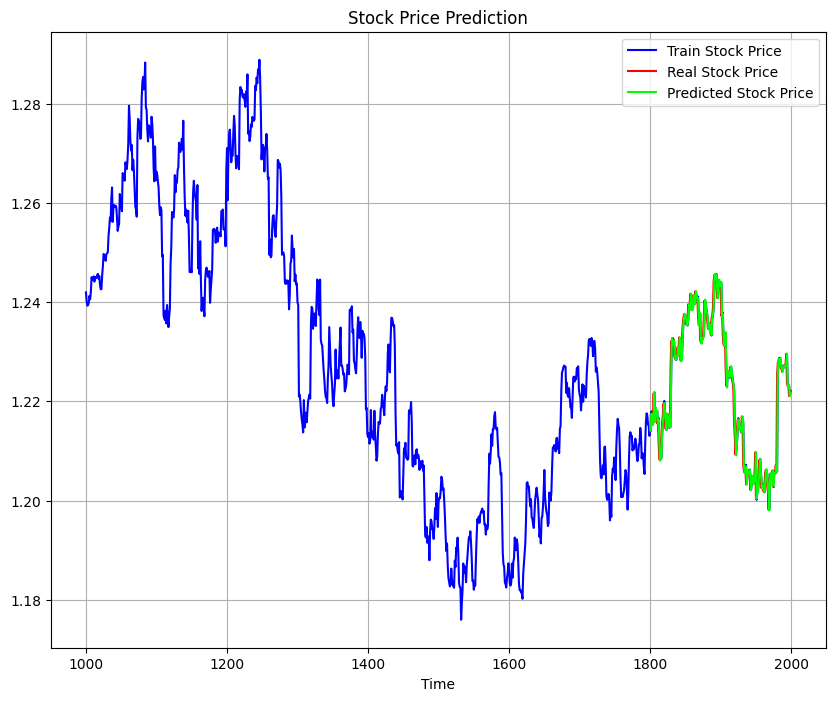

In [46]:
financial_data = financial_data.reset_index(drop=True)
financial_data = financial_data[:2000]
plt.figure(figsize=(10,8))
plt.plot(financial_data.index[-1000:], financial_data['Open'].tail(1000), color='blue', label = 'Train Stock Price')
plt.plot(test.index, y, color = 'Red', label = 'Real Stock Price')
plt.plot(test.index, predictions, color = 'Lime', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.legend()
plt.grid(True)
plt.show()